<a href="https://colab.research.google.com/github/tamerTiemiem/tamer/blob/main/Copy_of_COVID19_30_12_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Understanding:-**
 1- Trying to understand What is the business target and how do we measure sucess this target.

 2- Identify the important variables that will act as the model target and whose associated metrics will be utilized to gauge the projects success .

 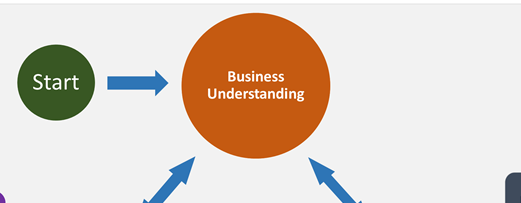


# **What is Pneumonia ?**

Pneumonia is an infection that inflames the air sacs in one or both lungs. The air sacs may fill with fluid or pus (purulent material), causing cough with phlegm or pus, fever, chills, and difficulty breathing. A variety of organisms, including bacteria, viruses and fungi, can cause pneumonia.

Pneumonia can range in seriousness from mild to life-threatening. It is most serious for infants and young children, people older than age 65, and people with health problems or weakened immune systems.
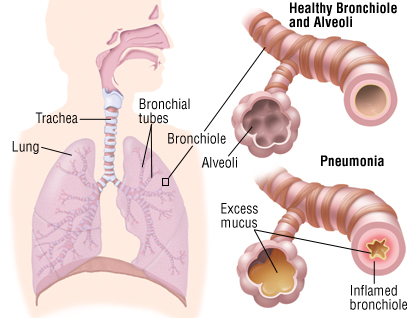 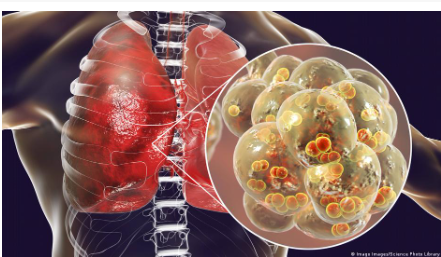

# **What is the problem and why Pneumonia Detection using CNN ?**
It is extremely difficult for a clinician to manually outline 3D lung lesions on hundreds of CT lung slices up to 1 millimeter thick, and artificial intelligence through deep learning can make this process very fast and accuracy rates may outpace manual diagnosis.


# **Authoers :**

https://arxiv.org/abs/2004.12823

Gianluca Maguolo , Loris Nanni

University of Padova

Received in 19 February 2021

 Accepted 11 April 2021
 
 Department - of Electrical Engineering and Systems Science > Image and Video Processing
COVID

# **DATASETS**

NIH dataset
The Chestx-ray8 dataset [20] was released by the National Institute of Health and is one of the largest public labelled datasets
in this field, which contains 108,948 images of 32,717 

# **Samples from the NIH dataset**

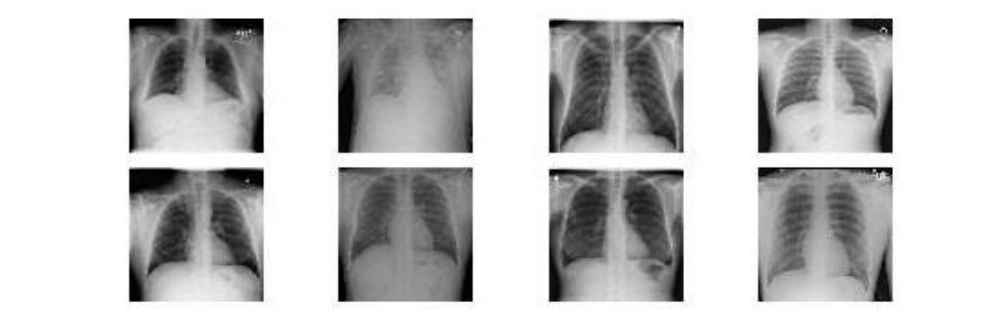

# **2.2 Library Import**

In [ ]:
import tensorflow.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input ,Dense,Activation,Flatten,Conv2D,MaxPool2D,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import metrics
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# **upload google drive in our**

In [ ]:
#upload google drive in our
from google.colab import drive
drive.mount('/content/drive') 
train_loc = '/content/drive/MyDrive/SplitData/train'
val_loc = '/content/drive/MyDrive/SplitData/val'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **What is Data Augmentation?** 
Data Augmentation is a technique that can be used to artificially expand the size of a training set by creating modified data from the existing one. It is a good practice to use DA if you want to prevent overfitting, or the initial dataset is too small to train on, or even if you want to squeeze better performance from your model and improve the performance of the model .

You can augment:

1- Audio

2- Text

3- Images

4- Any other types of data

Technique:-

Flipping 

     This means flipping the image horizontally or vertically
Rotation 

     This means to rotate the image by a given angle in the clockwise or anticlockwise direction

Scaling

     Scaling Images can be scaled outward or inward. When scaled outward, the image size increases while the image size decreases when scaled inwards.

In [ ]:
#Resize images
trdata = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

traindata = trdata.flow_from_directory(directory = train_loc,target_size=(224,224))

vldata = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

valdata = vldata.flow_from_directory(directory = val_loc,target_size=(224,224))

Found 449 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [ ]:
traindata.class_indices

{'COVID+': 0, 'COVID-': 1}

In [ ]:
valdata.class_indices

{'COVID+': 0, 'COVID-': 1}

# **Building The Model**

In [ ]:
#define size input
input_shape = (224,224,3)

#create The network

#input layer
img_input = Input(shape = input_shape, name = 'img_input')

#Build the model
x = Conv2D(32,(3,3),padding='same',activation='relu',name='layer_1')(img_input)
x = Conv2D(64,(3,3),padding='same',activation='relu',name='layer_2')(x)
x = MaxPool2D((2,2), strides=(2,2),name = 'layer_3')(x)
x = Dropout(0.25)(x)

x = Conv2D(64,(3,3),padding='same',activation='relu',name='layer_4')(x)
x = MaxPool2D((2,2), strides=(2,2),name = 'layer_5')(x)
x = Dropout(0.25)(x)

x = Conv2D(128,(3,3),padding='same',activation='relu',name='layer_6')(x)
x = MaxPool2D((2,2), strides=(2,2),name = 'layer_7')(x)
x = Dropout(0.25)(x)

x = Flatten(name = 'layer_8')(x)
x = Dense(64, name ='layer_9')(x)
x = Dropout(0.5)(x)

x = Dense(2, activation='sigmoid' , name ='predections')(x)


# **generate the model**

In [ ]:
#generate the model
model = Model(inputs = img_input, outputs  =x, name = 'CNN_COVID_19')

In [ ]:
model.summary()

Model: "CNN_COVID_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img_input (InputLayer)      [(None, 224, 224, 3)]     0         
                                                                 
 layer_1 (Conv2D)            (None, 224, 224, 32)      896       
                                                                 
 layer_2 (Conv2D)            (None, 224, 224, 64)      18496     
                                                                 
 layer_3 (MaxPooling2D)      (None, 112, 112, 64)      0         
                                                                 
 dropout (Dropout)           (None, 112, 112, 64)      0         
                                                                 
 layer_4 (Conv2D)            (None, 112, 112, 64)      36928     
                                                                 
 layer_5 (MaxPooling2D)      (None, 56, 56, 64)       

In [ ]:
#compiling the model
model.compile(optimizer='adam',loss = binary_crossentropy,metrics=['accuracy'])

In [ ]:
#start train and test
batch_size = 32
hist = model.fit(traindata,
                     steps_per_epoch = traindata.samples//batch_size,
                     validation_data = valdata,
                     validation_steps = valdata.samples//batch_size,
                     epochs = 20
                     )

Epoch 1/20
14/14 [==============================] - 392s 28s/step - loss: 1.3935 - accuracy: 0.7002 - val_loss: 0.5388 - val_accuracy: 0.7396
Epoch 2/20
14/14 [==============================] - 26s 2s/step - loss: 0.3997 - accuracy: 0.8417 - val_loss: 0.3499 - val_accuracy: 0.8681
Epoch 3/20
14/14 [==============================] - 26s 2s/step - loss: 0.2999 - accuracy: 0.8897 - val_loss: 0.3139 - val_accuracy: 0.9375
Epoch 4/20
14/14 [==============================] - 26s 2s/step - loss: 0.2939 - accuracy: 0.9137 - val_loss: 0.3072 - val_accuracy: 0.9375
Epoch 5/20
14/14 [==============================] - 26s 2s/step - loss: 0.2142 - accuracy: 0.9233 - val_loss: 0.3170 - val_accuracy: 0.9410
Epoch 6/20
14/14 [==============================] - 28s 2s/step - loss: 0.1681 - accuracy: 0.9472 - val_loss: 0.2348 - val_accuracy: 0.9583
Epoch 7/20
14/14 [==============================] - 26s 2s/step - loss: 0.1971 - accuracy: 0.9305 - val_loss: 0.2030 - val_accuracy: 0.9514
Epoch 8/20
14/14 [

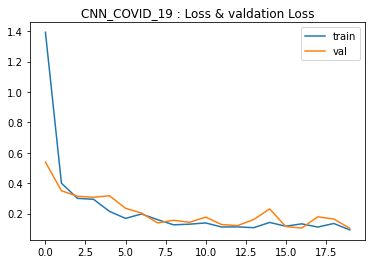

In [ ]:
from IPython.core import history
plt.plot(hist.history['loss'], label ='train')
plt.plot(hist.history['val_loss'], label = 'val')
plt.title('CNN_COVID_19 : Loss & valdation Loss')
plt.legend()
plt.show()

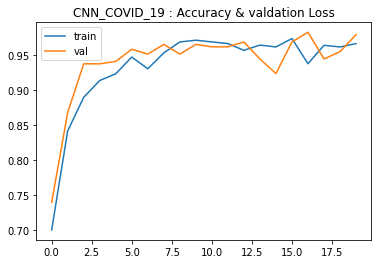

In [ ]:
from IPython.core import history
plt.plot(hist.history['accuracy'], label ='train')
plt.plot(hist.history['val_accuracy'], label = 'val')
plt.title('CNN_COVID_19 : Accuracy & valdation Loss')
plt.legend()
plt.show()

<ipython-input-14-c3b0f44bc876>:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(valdata)


Confusion Matrix
[[91 69]
 [70 70]]
classification_Report
              precision    recall  f1-score   support

      COVID+       0.57      0.57      0.57       160
      COVID-       0.50      0.50      0.50       140

    accuracy                           0.54       300
   macro avg       0.53      0.53      0.53       300
weighted avg       0.54      0.54      0.54       300



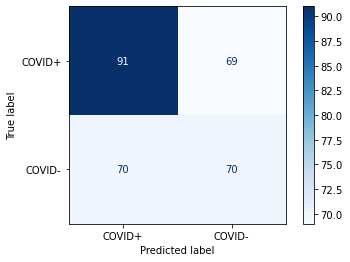

In [ ]:
# Confusion Matrix  & Pres  & Recall   & F1-Score

target_names = ['COVID+', 'COVID-']
label_names = [0,1]

Y_pred = model.predict_generator(valdata)
y_pred = np.argmax(Y_pred ,  axis = 1)

cm = confusion_matrix(valdata.classes, y_pred, labels = label_names)


print('Confusion Matrix')
print(confusion_matrix(valdata.classes, y_pred))

print('classification_Report')
print(classification_report(valdata.classes, y_pred, target_names=target_names))

disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=target_names)
disp = disp.plot(cmap=plt.cm.Blues, values_format = 'g')
plt.show()
